In [1]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

Text(0.5, 0, '$x_1$')

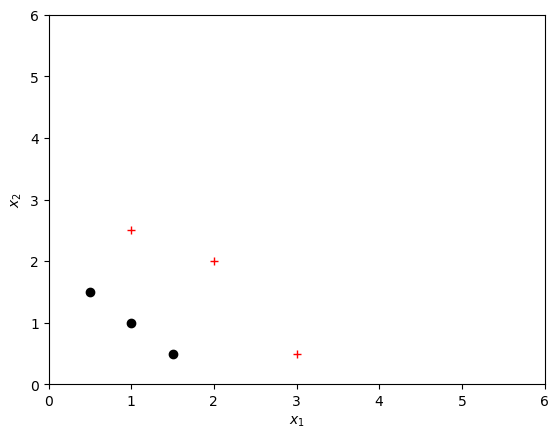

In [2]:
from lab_utils import plot_data
import matplotlib.pyplot as plt

plot_data(X,y)

# Set both axes to be from 0-6
plt.axis([0, 6, 0, 6])
# Set the y-axis label
plt.ylabel('$x_2$')
# Set the x-axis label
plt.xlabel('$x_1$')

In [3]:
# Add a column to X_orig to account for the w_0 term
X_mod = np.hstack([np.ones((X.shape[0],1)), X])

print(X_mod)

[[1.  0.5 1.5]
 [1.  1.  1. ]
 [1.  1.5 0.5]
 [1.  3.  0.5]
 [1.  2.  2. ]
 [1.  1.  2.5]]


In [4]:
from lab_utils import sigmoid 

print(sigmoid(0))

0.5


In [5]:
def compute_gradient(X, y, w):
    # Here X is assumed to pre-processed with a column of ones added as x_0
    m, n = X.shape
    dw = np.zeros_like(w)
    
    for j in range(n):
        gradient_list = []
        
        for i in range(m):        
            ### START CODE HERE ### 
            z = np.dot(w.T, X[i])
            f = sigmoid(z)
            gradient = (f-y[i])*X[i][j]
            ### END CODE HERE ### 
            gradient_list.append(gradient)
        
        dw[j] = (1/m)* sum(gradient_list)
        
    return dw

In [6]:
w = np.zeros(3)
compute_gradient(X_mod,y,w)

array([ 0.        , -0.25      , -0.16666667])

# Vectorized version

In [7]:
def compute_gradient_vectorized(X, y, w):
    
    m, n = X.shape
    
    ### START CODE HERE ### 
    z = np.dot(X, w)
    f = sigmoid(z)
    dw = (1/m)*np.dot(X.T, (f - y))
    ### END CODE HERE ### 
    return dw

In [8]:
print("Cost computed by non-vectorized version: ", compute_gradient(X_mod, y, w))
print("Cost computed by vectorized version: ", compute_gradient_vectorized(X_mod, y, w))

Cost computed by non-vectorized version:  [ 0.         -0.25       -0.16666667]
Cost computed by vectorized version:  [ 0.         -0.25       -0.16666667]
